## Objetivo
Com este código, você irá:
- automatizar o processo de otimizar $w$ e $b$ usando o Método do Gradiente.

# Método do Gradiente para Regressão Linear

## Ferramentas

Nesse código, você usará:
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras a partir de dados

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import math


## Definição do Problema


Usaremos as mesmas amostras de dados que já utilizamos em códigos anteriores:

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |

In [207]:
# Carregando nosso conjunto de dados:
x_trein = np.array([0.2, 4.5])       # característica
y_trein = np.array([21.0, 430.0])    # valor alvo


# regredindo no método chunchex o problema original - iremos utilizar somente o intercepto - dá mais graça às coisas
w = (y_trein[1]  - y_trein[0]) / (x_trein[1] - x_trein[0])
b = y_trein[0] - w * x_trein[0]

# calculando os valores para um resistor de 50 ohms
w = 50
w_truth = w
b_truth = b
# gerando uma quantidade suficiente de pontos
n_points = 1000
x_min = 1
x_max = 4
sigma = 1
mu = 0.0
delta = np.sqrt(12 * sigma ** 2) / 2
x_trein = np.linspace(x_min, x_max, n_points)

# instanciando um gerador aleatório - agradeço à numpy por isto
rng = np.random.default_rng(12345)

# gerando as sequências
y_trein = w * x_trein + b + rng.uniform(-delta, delta, n_points)
# é só descomentar a próxima linha para mudar a bagunça que faremos
# y_trein = w * x_trein + b + rng.normal(mu, sigma, n_points)

## Calculando o Custo

Essa parte foi desenvolvida no nosso último código. Vamos precisar aqui novamente:

In [208]:
def calcula_custo(x, y, w, b):
    """
    Calcula a função custo no âmbito da regressão linear.
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      y (ndarray (m,)): Valores alvo de saída
      w,b (escalar)   : Parâmetros do modelo
    Retorna
      custo_total (float): O custo custo de se usar w,b como parâmetros na regressão linear
               para ajustar os dados
    """
    # número de amostras de treinamento
    m = x.shape[0]

    soma_custo = 0
    for i in range(m):
        f_wb = w * x[i] + b
        custo = (f_wb - y[i]) ** 2
        soma_custo = soma_custo + custo
    custo_total = (1 / (2 * m)) * soma_custo

    return custo_total


## Método do Gradiente
Por enquanto, você já desenvolveu um modelo linear que estima $f_{w,b}(x^{(i)})$:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

Na regressão linear, você utiliza dados de treinamento para ajustar os parâmetros $w$,$b$ minimizando o erro entre suas previsões $f_{w,b}(x^{(i)})$ e os dados verdadeiros $y^{(i)}$. A soma dos erros quadráticos para todas as amostras $(x^{(i)},y^{(i)})$ é chamada de custo, e é denotada por $J(w,b)$:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


O Método do Gradiente então consiste em:

$$\begin{align*} \text{repetir}&\text{ até convergir:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
onde os parâmetros $w$, $b$ devem ser atualizados simultaneamente.  

O gradiente é definido como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Aqui, 'simultaneamente' significa que você deve calcular as derivadas parciais para todos os parâmetros antes de atualizar qualquer um desses parâmetros.


## Implementando o Método do Gradiente na Prática.
Você irá implementar o método do gradiente para uma única variável (característica). Para fazer isso, você precisará de três funções:
- `calcula_gradiente` implementando as equações (4) e (5) acima descritas
- `calcula_custo` implementando a equação (2) acima
- `metodo_do_gradiente`, utilizando as funções calcula_gradiente e calcula_custo

Convenções:
- A terminologia que usaremos em Python para variáveis contendo derivadas parciais é a serguinte: $\frac{\partial J(w,b)}{\partial b}$  será `dj_db`.




### calcula_gradiente


`calcula_gradiente`  implementa (4) e (5) acima e retorna $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.

In [209]:
def calcula_gradiente(x, y, w, b):
    """
    Calcula o gradiente para Regressão Linear
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      y (ndarray (m,)): Valores alvo de saída
      w,b (scalar)    : parâmetros do modelo
    Retorna
      dj_dw (scalar): O gradiente do custo em relação ao parâmetros w
      dj_db (scalar): O gradiente do custo em relação ao parâmetros b
     """

    # Número de amostras de treinamento
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_db += dj_db_i
        dj_db += dj_db_i

        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

<br/>

### Testando nossa implementação da função calcula_gradiente


Utilizando as linhas de código abaixo, teste diferentes valores para $b$ e $w$ com o objetivo de encontrar o valor mínimo da função custo $J(w,b)$

In [210]:
b = 0
w = 95

dj_dw, dj_db = calcula_gradiente(x_trein, y_trein, w, b)

print(dj_dw)

print(dj_db)

310.17072712993075
221.1035757891654


### Método do Gradiente

Agora que o gradiente pode ser calculado, o Método do Gradiente, descrito na equação (3), é implementado abaixo por meio da função `metodo_do_gradiente`. Os detalhes da implementação estão descritos nos comentários. Abaixo, você vai utilizar essa função para encontrar os valores ótimos para $w$ e $b$ levando em conta o conjunto de dados de treinamento.

In [211]:
def metodo_do_gradiente(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o Método do Gradiente para ajustar w,b. Atualiza w,b ao longo de
    num_iters passos (iterações) assumindo uma taxa de aprendizado alpha

    Argumentos da função:
      x (ndarray (m,))  : Conjunto de dados com m amostras
      y (ndarray (m,))  : Valores alvo de saída
      w_in,b_in (scalar): valores iniciais para os parâmetros w,b
      alpha (float):      taxa de aprendizado
      num_iters (int):    número de iterações para o método
      calcula_custo:      função responsável por calcular o custo
      calcula_gradiente:  função responsável por calcular o gradiente

    Retorna:
      w (scalar): Valor atualizado para w após rodar o Método do Gradiente
      b (scalar): Valor atualizado para b após rodar o Método do Gradiente
      J_history (List): Contém o histórico dos valores de custo
      p_history (list): Contém o histórico dos valores para [w,b]
      """

    # Arrays que armazenam os valores históricos de J e w para cada iteração para que seja possível fazer gráfico depois
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calcula o gradiente usando a função calcula_gradiente
        dj_dw, dj_db = calcula_gradiente(x, y, w , b)

        # Atualiza os parâmetros w,b a partir do gradiente calculado
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Salva o custo J para cada iteração
        if i<100000:
            J_history.append( calcula_custo(x, y, w , b))
            p_history.append([w,b])
        # Faz print em tempo real enquanto o Método do Gradiente estiver rodando
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteração {i:4}: Custo {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #retorna w,b e valores históricos

In [212]:
# Inicialização de parâmetros
w_init = 0
b_init = 0
# Parametrização do Método do Gradiente:
iteracoes = 3000
alpha = 1.0e-2
# Roda o método do gradiente
w_final, b_final, J_hist, p_hist = metodo_do_gradiente(x_trein ,y_trein, w_init, b_init, alpha,
                                                    iteracoes, calcula_custo, calcula_gradiente)
print(f"(w,b) Encontrados pelo Método do Gradiente: ({w_final:8.4f},{b_final:8.4f})")

Iteração    0: Custo 7.49e+03  dj_dw: -3.550e+02, dj_db: -2.539e+02   w:  3.550e+00, b: 2.53896e+00


Iteração  300: Custo 1.50e+01  dj_dw: -1.024e+00, dj_db:  2.799e+00   w:  4.403e+01, b: 1.82801e+01
Iteração  600: Custo 5.71e+00  dj_dw: -6.145e-01, dj_db:  1.679e+00   w:  4.643e+01, b: 1.17106e+01
Iteração  900: Custo 2.36e+00  dj_dw: -3.686e-01, dj_db:  1.007e+00   w:  4.787e+01, b: 7.76954e+00
Iteração 1200: Custo 1.16e+00  dj_dw: -2.211e-01, dj_db:  6.043e-01   w:  4.874e+01, b: 5.40536e+00
Iteração 1500: Custo 7.24e-01  dj_dw: -1.327e-01, dj_db:  3.625e-01   w:  4.926e+01, b: 3.98711e+00
Iteração 1800: Custo 5.68e-01  dj_dw: -7.959e-02, dj_db:  2.175e-01   w:  4.957e+01, b: 3.13631e+00
Iteração 2100: Custo 5.12e-01  dj_dw: -4.774e-02, dj_db:  1.305e-01   w:  4.975e+01, b: 2.62592e+00
Iteração 2400: Custo 4.92e-01  dj_dw: -2.864e-02, dj_db:  7.826e-02   w:  4.987e+01, b: 2.31975e+00
Iteração 2700: Custo 4.85e-01  dj_dw: -1.718e-02, dj_db:  4.695e-02   w:  4.993e+01, b: 2.13607e+00
(w,b) Encontrados pelo Método do Gradiente: ( 49.9744,  2.0262)


Observe algumas características do Método do Gradiente:

- O Custo começa elevado e decai rapidamente, conforme vimos na teoria.
- As derivadas parciais, `dj_dw`, e `dj_db` também diminuem, inicialmente mais rapidamente e depois mais devagar. Isso acontece porque as derivadas parciais se aproximam de zero à medida com que nos aproximamos do mínimo da função

### Custo versus iterações no Método do Gradiente

Um gráfico do custo versus iterações é uma métrica interessante para verificarmos o progresso feito pelo método. O custo deve sempre decair ao longo das iterações. A mudança no custo é rápida inicialmente, portanto, é útil plotar as primeiras iterações numa escala diferente das últimas iterações. Observe as escalas usadas nos gráficos abaixo.

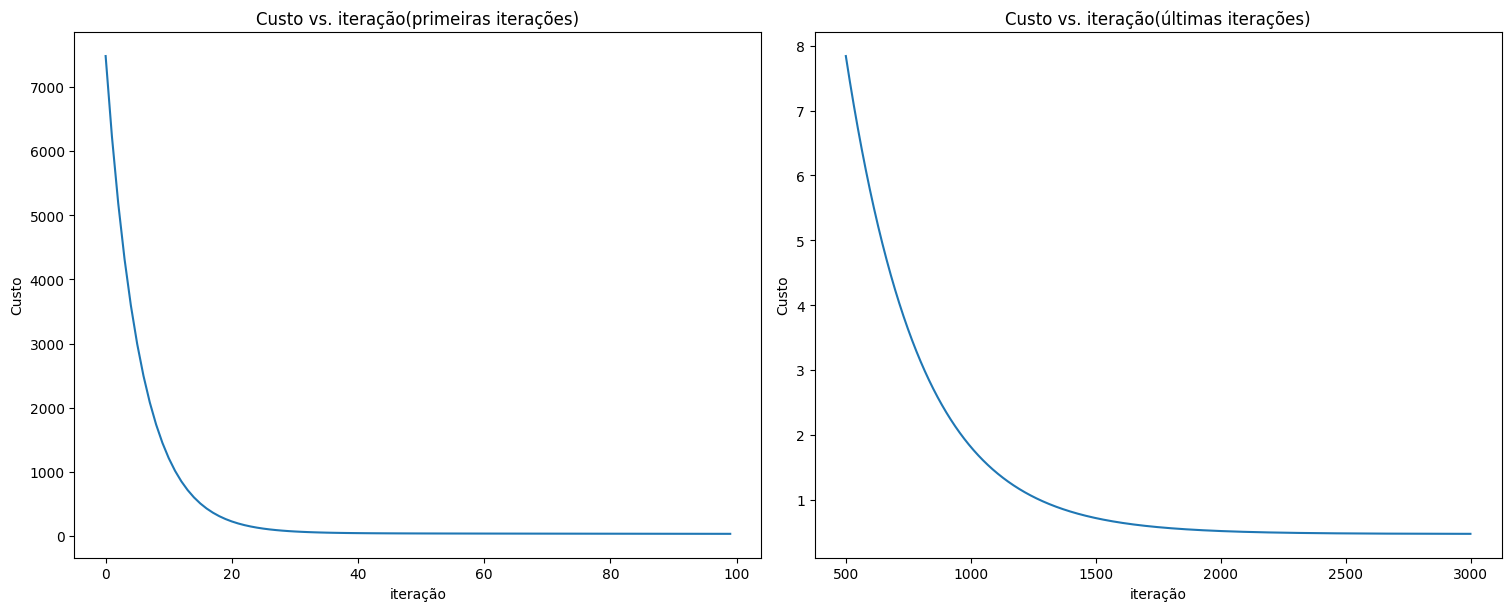

In [213]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

### Previsões


Agora que você já descobriu os valores ótimos para os parâmetros $w$ e $b$, você pode usar o modelo para prever o valor de tensão do resistor para diferentes valores de corrente.

Olhe os exemplos abaixo:


In [214]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

x_test = np.linspace(10, 20, 10)
messages = [f"Para uma corrente de {x:.2f} A temos uma tensão esperada de {w_final*x + b_final:0.1f} Volts" for x in x_test]
messages = "\n".join(messages)
print(messages)

Para uma corrente de 1 A temos uma tensão esperada de 52.0 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 119.5 Volts
Para uma corrente de 3 A temos uma tensão esperada de 151.9 Volts
Para uma corrente de 10.00 A temos uma tensão esperada de 501.8 Volts
Para uma corrente de 11.11 A temos uma tensão esperada de 557.3 Volts
Para uma corrente de 12.22 A temos uma tensão esperada de 612.8 Volts
Para uma corrente de 13.33 A temos uma tensão esperada de 668.4 Volts
Para uma corrente de 14.44 A temos uma tensão esperada de 723.9 Volts
Para uma corrente de 15.56 A temos uma tensão esperada de 779.4 Volts
Para uma corrente de 16.67 A temos uma tensão esperada de 834.9 Volts
Para uma corrente de 17.78 A temos uma tensão esperada de 890.5 Volts
Para uma corrente de 18.89 A temos uma tensão esperada de 946.0 Volts
Para uma corrente de 20.00 A temos uma tensão esperada de 1001.5 Volts



## Parabéns!
Você aprendeu o seguinte com esse código:
- Detalhes importantes acerca do Método do Gradiente para uma variável
- Desenvolveu uma rotina para o cálculo do gradiente
- completou a rotina que aplica o Método do Gradiente
- Utilizou o Método do Gradiente para encontrar os parâmetros ótimos para um modelo na forma de reta

## Calculando a reta extrapolando os valores do modelo

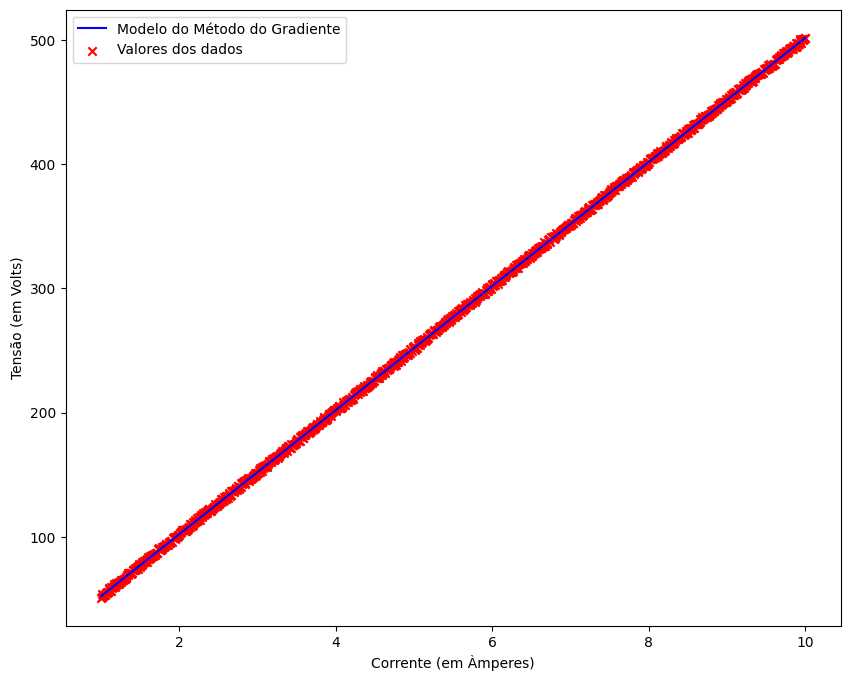

Custo J para esse conjunto de parâmetros w,b: 0.5067
dj_dw: -9.5185e-01, dj_db: -2.0893e-01


In [215]:
x_calc = np.linspace(1, 10, n_points)
# Calculando a tensão estimada para o modelo para as correntes em x_trein

noisy_signal = rng.uniform(-delta, delta, n_points)
# descomentar a próxima linha, para ver o desempenho ante um ruído gaussiano
# noisy_signal = rng.normal(mu, sigma, n_points) 

f_wb = w_final * x_calc + b_final
y_calc =  w_truth * x_calc + b_truth + noisy_signal

J = calcula_custo(x_calc, y_calc, w_final, b_final)

dj_dw, dj_db = calcula_gradiente(x_calc, y_calc, w_final, b_final)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_calc, f_wb, c='b',label='Modelo do Método do Gradiente')

# Plotando os dados medidos
plt.scatter(x_calc, y_calc, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()
print(f"Custo J para esse conjunto de parâmetros w,b: {J:.04f}")
print(f"dj_dw: {dj_dw:.4e}, dj_db: {dj_db:.4e}")

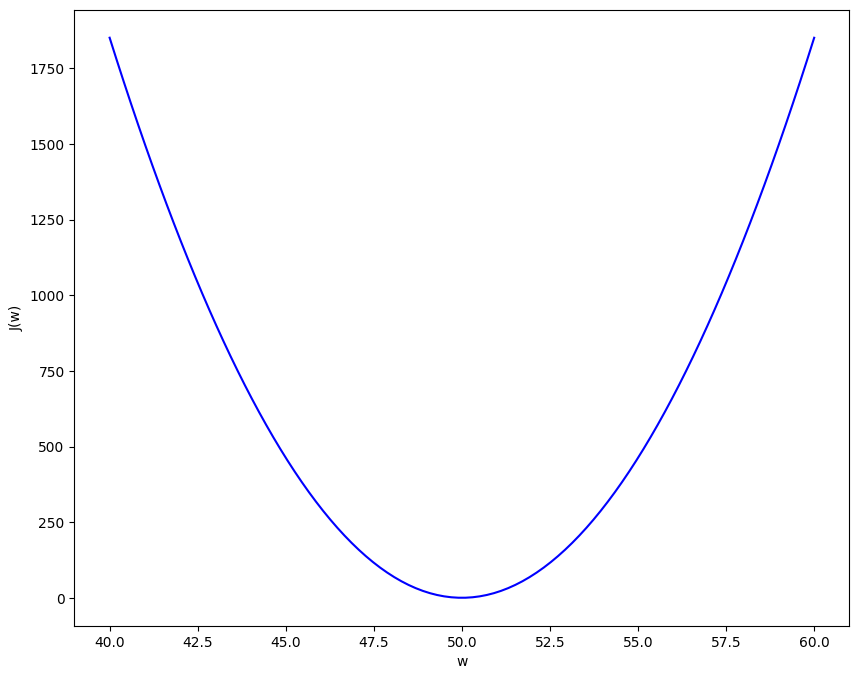

In [216]:
# valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
valores_para_w = np.linspace(40, 60, 100, endpoint=True) # deixando a curva mais bonitinha

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_calc, y_calc, w, b_final)

plt.figure(figsize=(10, 8))
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

## Happy Hour - Implementando métodos alternativos para efeitos de comparação
Algoritmos implementados:
- RMSProp
- Método de Newton
- SGD (Gradiente Estocástico)
- Gradiente Conjugado
- Adam

### **Método RMSProp**

O **RMSProp** (Root Mean Square Propagation) é um algoritmo de otimização baseado no método de gradiente descendente, projetado para resolver algumas limitações de técnicas mais simples, como o Gradiente Descendente Estocástico (SGD). Ele foi proposto por Geoffrey Hinton em uma palestra e é especialmente útil em problemas de redes neurais profundas, onde a convergência pode ser lenta ou inconstante.

#### **Intuição**
O RMSProp tenta lidar com dois problemas comuns no gradiente descendente:
1. **Oscilações no gradiente**: O RMSProp reduz oscilações indesejadas em direções de alta curvatura da função de custo (frequentemente observadas ao longo de eixos de inclinação íngreme).
2. **Taxa de aprendizado adaptativa**: Diferente de métodos clássicos, o RMSProp ajusta a taxa de aprendizado de forma dinâmica para cada parâmetro com base na magnitude recente dos gradientes.

#### **Parte Matemática**
No RMSProp, ao invés de usar diretamente o gradiente $\nabla J(\theta)$ para atualizar os parâmetros $\theta$, o algoritmo introduz uma forma de controlar a magnitude dos passos com base na média quadrática móvel dos gradientes.

Aqui estão as equações matemáticas que descrevem o algoritmo:

1. **Cálculo da média exponencial dos quadrados dos gradientes**:
   
   $
   E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2
   $
   Onde:
   - $g_t$ é o gradiente no tempo $t$.
   - $\beta$ é um parâmetro de decaimento (para a maior parte das aplicações um valor de 0.9).
   - $E[g^2]_t$ é a média exponencial do quadrado dos gradientes até o tempo $t$.

3. **Atualização dos parâmetros**:

   $
   \theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} g_t
   $
   Onde:
   - $\alpha$ é a taxa de aprendizado.
   - $\epsilon$ é um valor pequeno adicionado para evitar divisões por zero (tipicamente $10^{-8}$).
   - A divisão pelo termo $\sqrt{E[g^2]_t + \epsilon}$ ajusta a taxa de aprendizado para cada parâmetro de acordo com a magnitude recente de seus gradientes.

#### **Vantagens do RMSProp**

   - **Taxa de aprendizado adaptativa:** O RMSProp ajusta a taxa de aprendizado para cada parâmetro individualmente, o que facilita a convergência e ajuda a evitar grandes oscilações.
   - **Bom desempenho em redes profundas:** Funciona bem em redes neurais profundas, onde o gradiente pode variar bastante para diferentes parâmetros.
#### **Desvantagens do RMSProp**

   - **Dificuldade em Ajustar a Taxa de Decaimento:** O parâmetro de decaimento exponencial, que controla o quanto o gradiente é suavizado ao longo do tempo, pode ser sensível e difícil de ajustar corretamente para diferentes problemas. Uma escolha inadequada pode levar a uma convergência lenta ou até impedir a convergência.

   - **Estagnação em Mínimos Locais:** Como o RMSProp ajusta a taxa de aprendizado com base nas médias dos gradientes passados, pode acabar ficando preso em mínimos locais ou em regiões onde os gradientes são muito pequenos.

   - **Pode Precisar de Ajuste Adicional:** Embora o RMSProp forneça taxas de aprendizado adaptativas, ainda pode ser necessário ajustar o valor inicial da taxa de aprendizado global para obter bons resultados em alguns problemas.

In [217]:
def rmsprop(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente, beta=0.9, epsilon=1e-8):
    """
    Aplica o método RMSProp para ajustar w, b.

    Argumentos da função:
      x (ndarray (m,))  : Conjunto de dados com m amostras
      y (ndarray (m,))  : Valores alvo de saída
      w_in, b_in (scalar): Valores iniciais para os parâmetros w e b
      alpha (float)     : Taxa de aprendizado
      num_iters (int)   : Número de iterações
      calcula_custo     : Função para calcular o custo
      calcula_gradiente : Função para calcular o gradiente
      beta (float)      : Fator de decaimento para RMSProp (geralmente próximo de 0.9)
      epsilon (float)   : Pequeno valor para evitar divisão por zero no cálculo do gradiente (geralmente 1e-8)

    Retorna:
      w (scalar)        : Valor atualizado de w
      b (scalar)        : Valor atualizado de b
      J_history (list)  : Histórico dos valores de custo
      p_history (list)  : Histórico dos valores para [w, b]
    """

    # Inicializar variáveis
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    # Inicialização de acumuladores de gradiente
    v_dw = 0
    v_db = 0

    for i in range(num_iters):
        # Calcula o gradiente
        dj_dw, dj_db = calcula_gradiente(x, y, w, b)

        # Atualiza os acumuladores RMSProp para w e b
        v_dw = beta * v_dw + (1 - beta) * (dj_dw**2)
        v_db = beta * v_db + (1 - beta) * (dj_db**2)

        # Atualiza os parâmetros w e b
        w = w - alpha * dj_dw / (np.sqrt(v_dw) + epsilon)
        b = b - alpha * dj_db / (np.sqrt(v_db) + epsilon)

        # Armazena o custo para cada iteração
        J_history.append(calcula_custo(x, y, w, b))
        p_history.append([w, b])

        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4}: Custo {J_history[-1]:0.2e}, w: {w:0.3f}, b: {b:0.3f}")

    return w, b, J_history, p_history



### **Método de Newton**

O **método de Newton** é uma técnica de otimização numérica que utiliza informações de segunda ordem (a Hessiana, ou seja, a matriz de derivadas segundas) para encontrar o mínimo de uma função. Diferente do gradiente descendente, que usa apenas a inclinação da função para ajustar os parâmetros, o método de Newton também leva em conta a curvatura, proporcionando um caminho de otimização mais eficiente, especialmente em funções convexas.

#### **Intuição**

A ideia principal do método de Newton é aproximar a função de custo $J(\theta)$ por uma série de Taylor de segunda ordem. A aproximação quadrática da função de custo ao redor do ponto atual $\theta$ pode ser usada para encontrar a próxima iteração, onde o mínimo pode ser atingido mais rapidamente.

A atualização dos parâmetros é dada pela fórmula:

$
\theta_{t+1} = \theta_t - H^{-1} \nabla J(\theta)
$

Onde:
- $\theta_t$ é o vetor de parâmetros na iteração $t$,
- $\nabla J(\theta)$ é o gradiente da função de custo com relação a $\theta$,
- $H$ é a **matriz Hessiana**, que contém as derivadas segundas da função de custo com relação a $\theta$.

#### **Parte Matemática**

##### **Gradiente**

O gradiente $\nabla J(\theta)$ é o vetor de derivadas parciais da função de custo $J$ em relação aos parâmetros $\theta$:
$
\nabla J(\theta) = \left[ \frac{\partial J}{\partial \theta_1}, \frac{\partial J}{\partial \theta_2}, ..., \frac{\partial J}{\partial \theta_n} \right]
$

##### **Hessiana**

A matriz Hessiana $H$ é uma matriz quadrada de ordem $n \times n$ que contém todas as derivadas segundas da função de custo com respeito aos parâmetros $\theta$:

$
H = 
\begin{bmatrix}
\frac{\partial^2 J(w, b)}{\partial w^2} & \frac{\partial^2 J(w, b)}{\partial w \partial b} \\
\frac{\partial^2 J(w, b)}{\partial b \partial w} & \frac{\partial^2 J(w, b)}{\partial b^2}
\end{bmatrix}
$

Ela captura a curvatura da função de custo, e sua inversa permite ajustar os passos com mais precisão, levando em consideração a geometria local da função.

#### **Vantagens do Método de Newton**

- **Convergência Rápida**: Quando a função de custo é convexa, o método de Newton pode convergir muito mais rápido que o gradiente descendente, pois leva em conta a curvatura.
- **Passos Adaptativos**: A atualização dos parâmetros é baseada na inversa da Hessiana, o que ajusta automaticamente o tamanho dos passos dependendo da curvatura local.

#### **Desvantagens do Método de Newton**

- **Custo Computacional**: O cálculo da matriz Hessiana e sua inversa pode ser computacionalmente caro, especialmente para problemas com alta dimensionalidade.
- **Não Adequado para Funções Não Convexas**: Se a função de custo não for convexa, o método de Newton pode falhar ao encontrar um mínimo global, convergindo para mínimos locais ou pontos de sela.


In [218]:

def calcula_hessiana(x, y, w, b):
    """
    Calcula a matriz Hessiana da função de custo para regressão linear.

    Argumentos:
      x (ndarray (m,)) : Conjunto de dados com m amostras
      y (ndarray (m,)) : Valores alvo de saída
      w (scalar)       : Parâmetro w da regressão linear
      b (scalar)       : Parâmetro b da regressão linear

    Retorna:
      H (ndarray (2,2)): Matriz Hessiana 2x2
    """

    m = len(x)

    # Calcula os elementos da matriz Hessiana
    H_ww = (1/m) * np.sum(x ** 2)  # ∂²J/∂w²
    H_wb = (1/m) * np.sum(x)       # ∂²J/∂w∂b ou ∂²J/∂b∂w
    H_bb = 1                       # ∂²J/∂b²

    # Matriz Hessiana 2x2
    H = np.array([[H_ww, H_wb],
                  [H_wb, H_bb]])

    return H


def metodo_de_newton(x, y, w_in, b_in, num_iters, calcula_custo, calcula_gradiente, calcula_hessiana, tol=1e-5):
    """
    Aplica o Método de Newton para ajustar w, b.

    Argumentos da função:
      x (ndarray (m,))  : Conjunto de dados com m amostras
      y (ndarray (m,))  : Valores alvo de saída
      w_in, b_in (scalar): Valores iniciais para os parâmetros w e b
      num_iters (int)   : Número de iterações máximas
      calcula_custo     : Função para calcular o custo
      calcula_gradiente : Função para calcular o gradiente
      calcula_hessiana  : Função para calcular a Hessiana
      tol (float)       : Tolerância para a convergência

    Retorna:
      w (scalar)        : Valor atualizado de w
      b (scalar)        : Valor atualizado de b
      J_history (list)  : Histórico dos valores de custo
      p_history (list)  : Histórico dos valores para [w, b]
    """

    # Inicializar variáveis
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calcula o gradiente e a Hessiana
        dj_dw, dj_db = calcula_gradiente(x, y, w, b)
        H = calcula_hessiana(x, y, w, b)
        
        # Vetor de gradientes
        grad = np.array([dj_dw, dj_db])
        
        # Montar a Hessiana como uma matriz 2x2
        H_inv = np.linalg.inv(H)  # Inversão da matriz Hessiana

        # Atualiza os parâmetros w e b
        update = np.dot(H_inv, grad)  # H^(-1) * grad
        w = w - update[0]
        b = b - update[1]

        # Armazena o custo e os parâmetros
        J_history.append(calcula_custo(x, y, w, b))
        p_history.append([w, b])

        # Verifica a convergência pelo tamanho do gradiente
        if np.linalg.norm(grad) < tol:
            print(f"Convergência atingida na iteração {i}.")
            break

        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4}: Custo {J_history[-1]:0.2e}, w: {w:0.3f}, b: {b:0.3f}")

    return w, b, J_history, p_history



### **Gradiente Descendente Estocástico (SGD)**

O **Gradiente Descendente Estocástico (SGD)** é uma variante do método de gradiente descendente que atualiza os parâmetros do modelo utilizando apenas um subconjunto (ou uma única amostra) do conjunto de dados a cada iteração. Essa abordagem pode resultar em uma convergência mais rápida, especialmente em grandes conjuntos de dados.

#### **Intuição**

O gradiente descendente tradicional utiliza a média de todos os gradientes das amostras para atualizar os parâmetros, o que pode ser computacionalmente custoso para grandes conjuntos de dados. O SGD, por outro lado, escolhe aleatoriamente uma amostra ou um mini-lote de amostras para calcular a atualização do parâmetro, permitindo que o algoritmo comece a atualizar os parâmetros imediatamente, o que pode acelerar a convergência e ajudar a escapar de mínimos locais.

##### **Parte Matemática**

A atualização dos parâmetros $\theta$ no SGD é dada pela seguinte fórmula:

$
\theta_{t+1} = \theta_t - \alpha \nabla J(\theta_t; x^{(i)}, y^{(i)})
$

Onde:
- $\theta_t$ é o vetor de parâmetros na iteração $t$,
- $\alpha$ é a taxa de aprendizado,
- $\nabla J(\theta_t; x^{(i)}, y^{(i)})$ é o gradiente da função de custo calculado para a amostra $(x^{(i)}, y^{(i)})$.

#### **Vantagens do SGD**

1. **Eficiência Computacional**: O SGD é muito mais rápido que o gradiente descendente padrão em grandes conjuntos de dados, pois utiliza apenas uma amostra (ou um pequeno lote) para cada atualização.
2. **Capacidade de Escapar de Mínimos Locais**: A natureza estocástica do SGD pode ajudar a escapar de mínimos locais, uma característica especialmente útil em funções de custo não convexas.

#### **Desvantagens do SGD**

1. **Oscilações**: As atualizações estocásticas podem causar oscilações na função de custo, dificultando a convergência em um mínimo global.
2. **Escolha da Taxa de Aprendizado**: A escolha da taxa de aprendizado pode ser crítica; uma taxa muito alta pode levar a uma divergência, enquanto uma taxa muito baixa pode resultar em uma convergência muito lenta.


In [219]:

def sgd(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o Método do Gradiente Estocástico (SGD) para ajustar w, b.

    Argumentos da função:
      x (ndarray (m,))  : Conjunto de dados com m amostras
      y (ndarray (m,))  : Valores alvo de saída
      w_in, b_in (scalar): Valores iniciais para os parâmetros w e b
      alpha (float)     : Taxa de aprendizado
      num_iters (int)   : Número de iterações
      calcula_custo     : Função para calcular o custo
      calcula_gradiente : Função para calcular o gradiente

    Retorna:
      w (scalar)        : Valor atualizado de w
      b (scalar)        : Valor atualizado de b
      J_history (list)  : Histórico dos valores de custo
      p_history (list)  : Histórico dos valores para [w, b]
    """

    # Inicializar variáveis
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    m = len(x)  # Número de amostras

    for i in range(num_iters):
        # Embaralhar os dados a cada iteração
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        # Atualiza w e b para cada exemplo de treinamento
        for j in range(m):
            # Seleciona uma única amostra
            x_i = x_shuffled[j:j+1]
            y_i = y_shuffled[j:j+1]

            # Calcula o gradiente para essa amostra
            dj_dw, dj_db = calcula_gradiente(x_i, y_i, w, b)

            # Atualiza os parâmetros w e b
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        # Armazena o custo após a passagem por todo o conjunto de dados
        J_history.append(calcula_custo(x, y, w, b))
        p_history.append([w, b])

        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4}: Custo {J_history[-1]:0.2e}, w: {w:0.3f}, b: {b:0.3f}")

    return w, b, J_history, p_history


### **Método de Gradiente Conjugado**

O **Método de Gradiente Conjugado** é uma técnica eficiente para resolver sistemas de equações lineares e minimizar funções quadráticas. Ele é amplamente utilizado em otimização, especialmente quando o número de parâmetros é grande, pois evita a necessidade de calcular a matriz Hessiana (que pode ser muito custosa em termos computacionais).

Neste caso, aplicamos o **Gradiente Conjugado** para ajustar os parâmetros $w$ e $b$ de um modelo de regressão linear. O método explora as propriedades da função de custo para determinar a direção ótima de descida a cada iteração, buscando melhorar a velocidade de convergência em comparação ao gradiente descendente comum.

#### **Descrição do Algoritmo**

1. **Inicialização**:
    - Definimos os valores iniciais de $w$ e $b$ como $w_{in}$ e $b_{in}$, que serão ajustados pelo algoritmo.
    - Os gradientes anteriores ($g_{prev_w}$, $g_{prev_b}$) são inicializados como $0$, assim como as direções conjugadas ($p_w$, $p_b$).

2. **Cálculo do Gradiente**:
    - Em cada iteração, calculamos o gradiente da função de custo em relação a $w$ e $b$ usando a função **calcula_gradiente**.

3. **Critério de Parada**:
    - Se a norma do gradiente for menor que um limiar definido ($tol$), o algoritmo para, indicando que a convergência foi atingida.

4. **Atualização da Direção Conjugada**:
    - Na primeira iteração, a direção de descida é definida como o negativo do gradiente.
    - Em iterações subsequentes, calculamos o fator $\beta_t$ (Polak-Ribiére), que ajusta a nova direção de descida em função da direção anterior, de forma que as direções permaneçam conjugadas.

5. **Busca Linear e Atualização**:
    - A cada iteração, atualizamos $w$ e $b$ na direção conjugada calculada, com um passo de tamanho $\alpha$.

6. **Histórico de Custo**:
    - Armazenamos o valor do custo em cada iteração para monitorar o progresso da otimização.


In [220]:
import numpy as np

def gradiente_conjugado(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente, tol=1e-6):
    """
    Método de Gradiente Conjugado para ajuste de w e b.
    
    Argumentos:
      x (ndarray (m,))  : Conjunto de dados com m amostras
      y (ndarray (m,))  : Valores alvo de saída
      w_in, b_in (scalar): Valores iniciais para os parâmetros w e b
      alpha (float): tamanho de passo ou taxa de aprendizado
      num_iters (int)   : Número de iterações
      calcula_custo: Função para calcular o custo.
      calcula_gradiente: Função para calcular o gradiente.
      tol (float): Tolerância para critério de parada.

    Retorna:
      w (scalar)        : Valor atualizado de w
      b (scalar)        : Valor atualizado de b
      J_history (list)  : Histórico dos valores de custo
      p_history (list)  : Histórico dos valores para [w, b]
    """
    w = w_in
    b = b_in
    J_history = []
    p_history = []
    
    g_prev_w, g_prev_b = 0, 0
    p_w, p_b = 0, 0
    
    for t in range(1, num_iters + 1):
        # Calcula o gradiente
        dj_dw, dj_db = calcula_gradiente(x, y, w, b)
        
        # Critério de parada
        if np.linalg.norm(np.array([dj_dw, dj_db])) < tol:
            print(f"Convergência atingida na iteração {t}.")
            break
        
        # Se for a primeira iteração, inicializa p como o negativo do gradiente
        if t == 1:
            p_w = -dj_dw
            p_b = -dj_db
        else:
            # Computa beta_t usando o método Polak-Ribiére
            beta_t = (dj_dw**2 + dj_db**2) / (g_prev_w**2 + g_prev_b**2)
            p_w = -dj_dw + beta_t * p_w
            p_b = -dj_db + beta_t * p_b
        
        # Realiza a atualização (uma simples linha de busca com passo fixo pode ser usada)
        w = w + alpha * p_w
        b = b + alpha * p_b
        
        # Calcula o custo e armazena no histórico
        J_history.append(calcula_custo(x, y, w, b))
        p_history.append([w, b])
        
        # Atualiza o gradiente anterior
        g_prev_w = dj_dw
        g_prev_b = dj_db
        
        # Exibe o progresso em intervalos regulares
        if t % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {t:4}: Custo {J_history[-1]:0.2e}, w: {w:0.3f}, b: {b:0.3f}")
    
    return w, b, J_history, p_history


### **Algoritmo Adam (Adaptive Moment Estimation)**

O algoritmo **Adam** combina as ideias dos métodos de **Momentum** e **RMSProp** para realizar uma atualização adaptativa dos parâmetros durante a otimização. Ele ajusta a taxa de aprendizado de cada parâmetro individualmente, com base em estimativas de momentos de primeira e segunda ordem.

#### **Etapas do Algoritmo**

1. **Inicialização**:
   - Inicializa os momentos $m_w, m_b, v_w, v_b$ como zeros, onde:
     - $m_w, m_b$ são as médias móveis exponenciais dos gradientes para os parâmetros $w$ e $b$.
     - $v_w, v_b$ são as médias móveis exponenciais dos quadrados dos gradientes.
   - Define os hiperparâmetros: taxa de aprendizado $\alpha$, decaimentos $\beta_1, \beta_2$ e um pequeno valor $\epsilon$ para evitar divisão por zero (estabilização numérica).

2. **Atualização dos Momentos**:

   - A cada iteração, atualiza as médias móveis dos gradientes:
    
     $
     m_w = \beta_1 m_w + (1 - \beta_1) \cdot \nabla J(w)
     $

     $
     m_b = \beta_1 m_b + (1 - \beta_1) \cdot \nabla J(b)
     $
     
   - Atualiza as médias móveis dos quadrados dos gradientes:

     $
     v_w = \beta_2 v_w + (1 - \beta_2) \cdot \left( \nabla J(w) \right)^2
     $

     $
     v_b = \beta_2 v_b + (1 - \beta_2) \cdot \left( \nabla J(b) \right)^2
     $

3. **Correção de Bias**:
   - Como $m_w$, $m_b$, $v_w$ e $v_b$ estão inicialmente tendenciosos em direção a zero nas primeiras iterações, faz-se a correção de tendência:

     $
     m_w^{\text{corrigido}} = \frac{m_w}{1 - \beta_1^t}, \quad m_b^{\text{corrigido}} = \frac{m_b}{1 - \beta_1^t}
     $

     $
     v_w^{\text{corrigido}} = \frac{v_w}{1 - \beta_2^t}, \quad v_b^{\text{corrigido}} = \frac{v_b}{1 - \beta_2^t}
     $

4. **Atualização dos Parâmetros**:
   - Finalmente, os parâmetros $w$ e $b$ são atualizados de acordo com as médias corrigidas e os quadrados dos gradientes:

     $
     w = w - \alpha \cdot \frac{m_w^{\text{corrigido}}}{\sqrt{v_w^{\text{corrigido}}} + \epsilon}
     $

     $
     b = b - \alpha \cdot \frac{m_b^{\text{corrigido}}}{\sqrt{v_b^{\text{corrigido}}} + \epsilon}
     $

### Hiperparâmetros do Adam

- $\alpha$ : Taxa de aprendizado (comumente $0.001$).
- $\beta_1$ : Exponencial para a média dos gradientes (geralmente $0.9$).
- $\beta_2$ : Exponencial para a média dos gradientes ao quadrado (geralmente $0.999$).
- $\epsilon$ : Pequeno valor para evitar divisão por zero (geralmente $10^{-8}$).

### Vantagens do Adam

- **Taxa de aprendizado adaptativa**: O Adam ajusta automaticamente a taxa de aprendizado para cada parâmetro, o que torna o algoritmo mais robusto em diferentes tipos de problemas.
- **Combinação de Momentos**: Aproveita a média dos gradientes (momentum) e as variâncias dos gradientes (RMSProp), combinando os benefícios dos dois métodos.
- **Desempenho em Redes Neurais**: Funciona bem em redes neurais profundas e problemas onde o gradiente pode variar muito entre parâmetros.


In [221]:
def adam(x, y, w_in, b_in, alpha, beta1, beta2, epsilon, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o algoritmo Adam para otimização de w e b.

    Argumentos:
      x (ndarray): Conjunto de dados com m amostras e n características.
      y (ndarray): Valores alvo de saída.
      w_in (ndarray): Valores iniciais para os parâmetros w.
      b_in (scalar): Valor inicial para o parâmetro b.
      alpha (float): Taxa de aprendizado.
      beta1 (float): Exponencial para a média dos gradientes.
      beta2 (float): Exponencial para a média dos gradientes ao quadrado.
      epsilon (float): Pequeno valor para evitar divisão por zero.
      num_iters (int): Número total de iterações.
      calcula_custo: Função que calcula o custo.
      calcula_gradiente: Função que calcula o gradiente.

    Retorna:
      w (ndarray): Valor otimizado de w.
      b (scalar): Valor otimizado de b.
      J_history (list): Histórico dos valores de custo.
    """
    w = w_in
    b = b_in
    m_w, v_w = np.zeros_like(w), np.zeros_like(w)  # Inicialização dos momentos de w
    m_b, v_b = 0, 0  # Inicialização dos momentos de b

    J_history = []
    p_history = []

    for t in range(1, num_iters + 1):
        # Calcula o gradiente
        dj_dw, dj_db = calcula_gradiente(x, y, w, b)

        # Atualiza as médias e variâncias dos gradientes (momentos)
        m_w = beta1 * m_w + (1 - beta1) * dj_dw
        m_b = beta1 * m_b + (1 - beta1) * dj_db

        v_w = beta2 * v_w + (1 - beta2) * (dj_dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (dj_db ** 2)

        # Correções de bias
        m_w_corrigido = m_w / (1 - beta1 ** t)
        m_b_corrigido = m_b / (1 - beta1 ** t)
        v_w_corrigido = v_w / (1 - beta2 ** t)
        v_b_corrigido = v_b / (1 - beta2 ** t)

        # Atualiza os parâmetros
        w -= alpha * (m_w_corrigido / (np.sqrt(v_w_corrigido) + epsilon))
        b -= alpha * (m_b_corrigido / (np.sqrt(v_b_corrigido) + epsilon))

        # Armazena o custo atual
        J_history.append(calcula_custo(x, y, w, b))
        p_history.append([w, b])

        # Exibe o progresso em intervalos regulares
        if t % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {t:4}: Custo {J_history[-1]:0.2e}, w: {w:0.3f}, b: {b:0.3f}")

    return w, b, J_history, p_history

### Parte Prática

#### Rodando o RMSProp

In [222]:
iteracoes = 3000
# meio dificil lidar com a taxa de aprendizado deste algoritmo
alpha = 0.085
# Roda o método do gradiente
w_final, b_final, J_hist, p_hist = rmsprop(x_trein ,y_trein, w_init, b_init, alpha,
                                                    iteracoes, calcula_custo, calcula_gradiente)
print(f"(w,b) Encontrados pelo Método RMSProp: ({w_final:8.4f},{b_final:8.4f})")

Iteração    0: Custo 8.87e+03, w: 0.269, b: 0.269
Iteração  300: Custo 9.35e+02, w: 25.529, b: 25.481
Iteração  600: Custo 2.49e+01, w: 42.407, b: 23.207
Iteração  900: Custo 4.98e-01, w: 49.958, b: 2.226
Iteração 1200: Custo 4.92e-01, w: 50.078, b: 1.903
Iteração 1500: Custo 4.92e-01, w: 50.078, b: 1.903
Iteração 1800: Custo 4.92e-01, w: 50.078, b: 1.903
Iteração 2100: Custo 4.92e-01, w: 50.078, b: 1.903
Iteração 2400: Custo 4.92e-01, w: 50.078, b: 1.903
Iteração 2700: Custo 4.92e-01, w: 50.078, b: 1.903
Iteração 2999: Custo 4.92e-01, w: 49.993, b: 1.818
(w,b) Encontrados pelo Método RMSProp: ( 49.9925,  1.8182)


#### Custo versus iterações no Método RMSProp

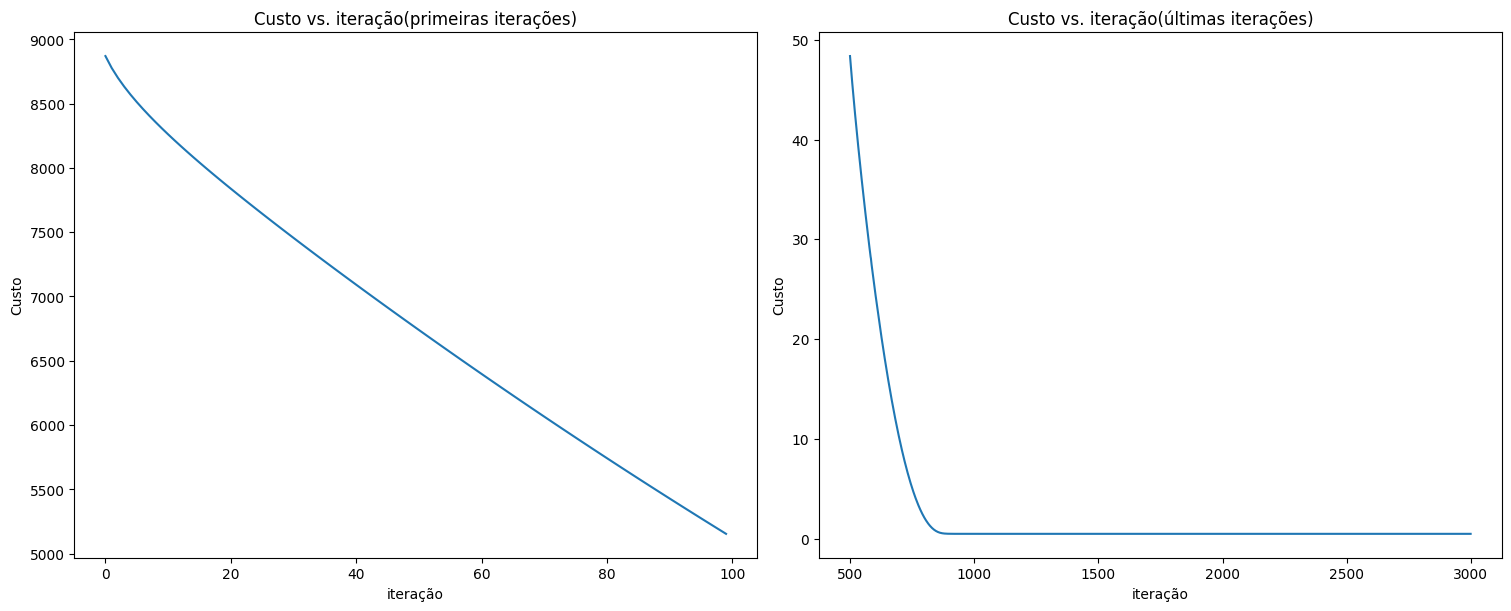

In [223]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

#### Previsões Utilizando os parâmetros encontrados pelo Método RMSProp

In [224]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

x_test = np.linspace(10, 20, 10)
messages = [f"Para uma corrente de {x:.2f} A temos uma tensão esperada de {w_final*x + b_final:0.1f} Volts" for x in x_test]
messages = "\n".join(messages)
print(messages)

Para uma corrente de 1 A temos uma tensão esperada de 51.8 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 119.3 Volts
Para uma corrente de 3 A temos uma tensão esperada de 151.8 Volts
Para uma corrente de 10.00 A temos uma tensão esperada de 501.7 Volts
Para uma corrente de 11.11 A temos uma tensão esperada de 557.3 Volts
Para uma corrente de 12.22 A temos uma tensão esperada de 612.8 Volts
Para uma corrente de 13.33 A temos uma tensão esperada de 668.4 Volts
Para uma corrente de 14.44 A temos uma tensão esperada de 723.9 Volts
Para uma corrente de 15.56 A temos uma tensão esperada de 779.5 Volts
Para uma corrente de 16.67 A temos uma tensão esperada de 835.0 Volts
Para uma corrente de 17.78 A temos uma tensão esperada de 890.6 Volts
Para uma corrente de 18.89 A temos uma tensão esperada de 946.1 Volts
Para uma corrente de 20.00 A temos uma tensão esperada de 1001.7 Volts


#### Calculando a reta extrapolando os valores do modelo

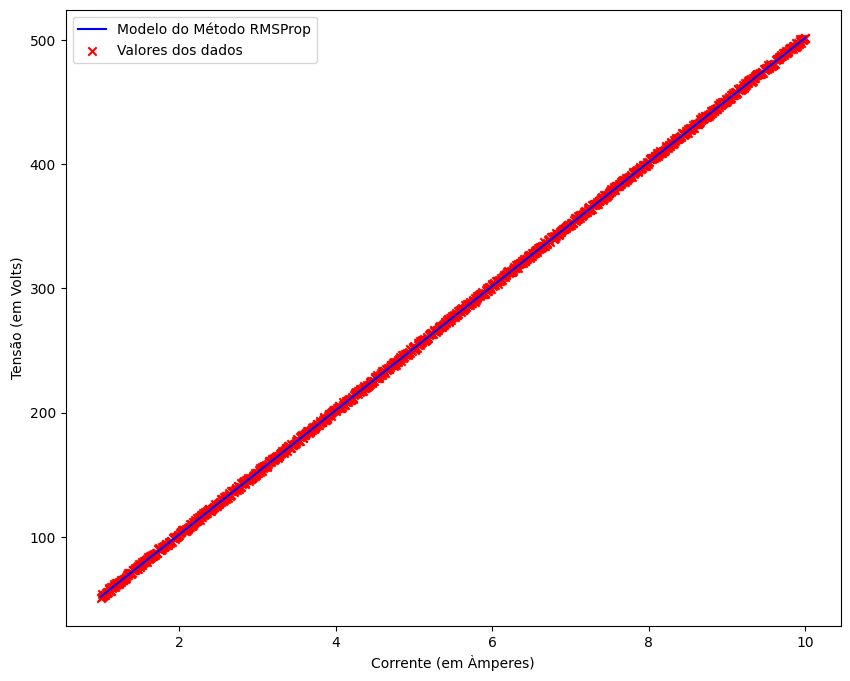

Custo J para esse conjunto de parâmetros w,b: 0.5182
dj_dw: -1.4273e+00, dj_db: -4.2623e-01


In [225]:
f_wb = w_final * x_calc + b_final

J = calcula_custo(x_calc, y_calc, w_final, b_final)

dj_dw, dj_db = calcula_gradiente(x_calc, y_calc, w_final, b_final)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_calc, f_wb, c='b',label='Modelo do Método RMSProp')

# Plotando os dados medidos
plt.scatter(x_calc, y_calc, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()
print(f"Custo J para esse conjunto de parâmetros w,b: {J:.04f}")
print(f"dj_dw: {dj_dw:.4e}, dj_db: {dj_db:.4e}")

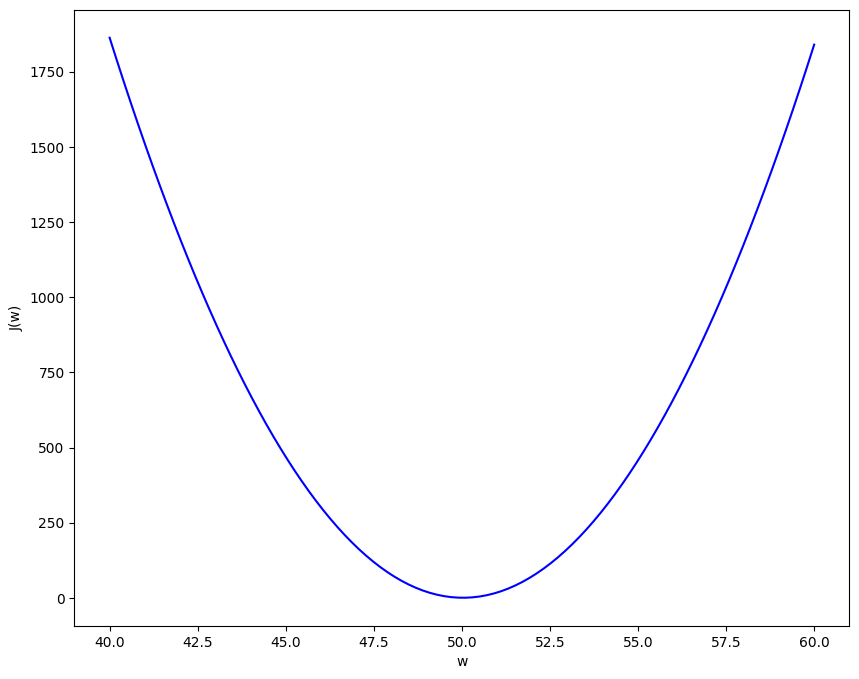

In [226]:
# valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
valores_para_w = np.linspace(40, 60, 100, endpoint=True) # deixando a curva mais bonitinha

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_calc, y_calc, w, b_final)

plt.figure(figsize=(10, 8))
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

#### Rodando o Método de Newton

In [227]:
iteracoes = 3000
# o método é deveras sensível ao ponto inicial - este deve ser próximo do ponto de interesse
w_inicial = 49.5
b_inicial = 1.95
# Roda o método do gradiente
w_final, b_final, J_hist, p_hist = metodo_de_newton(x_trein ,y_trein, w_inicial, b_inicial,                                                    iteracoes, calcula_custo, calcula_gradiente, calcula_hessiana)
print(f"(w,b) Encontrados pelo Método de Newton: ({w_final:8.4f},{b_final:8.4f})")

Iteração    0: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração  300: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração  600: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração  900: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 1200: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 1500: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 1800: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 2100: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 2400: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 2700: Custo 7.74e+00, w: 45.883, b: 13.490
Iteração 2999: Custo 7.74e+00, w: 54.187, b: -9.769
(w,b) Encontrados pelo Método de Newton: ( 54.1874, -9.7685)


#### Custo versus iterações no Método De Newton

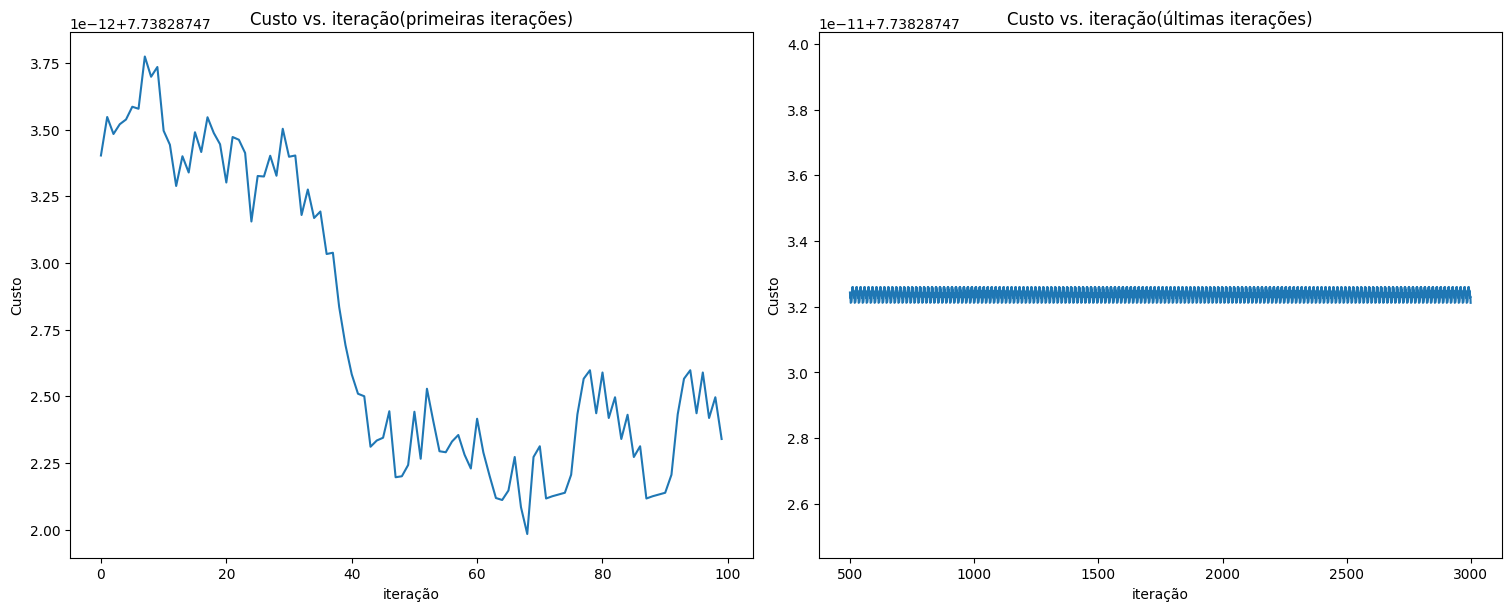

In [228]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

#### Previsões Utilizando os parâmetros encontrados pelo Método de Newton

In [229]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

x_test = np.linspace(10, 20, 10)
messages = [f"Para uma corrente de {x:.2f} A temos uma tensão esperada de {w_final*x + b_final:0.1f} Volts" for x in x_test]
messages = "\n".join(messages)
print(messages)

Para uma corrente de 1 A temos uma tensão esperada de 44.4 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 117.6 Volts
Para uma corrente de 3 A temos uma tensão esperada de 152.8 Volts
Para uma corrente de 10.00 A temos uma tensão esperada de 532.1 Volts
Para uma corrente de 11.11 A temos uma tensão esperada de 592.3 Volts
Para uma corrente de 12.22 A temos uma tensão esperada de 652.5 Volts
Para uma corrente de 13.33 A temos uma tensão esperada de 712.7 Volts
Para uma corrente de 14.44 A temos uma tensão esperada de 772.9 Volts
Para uma corrente de 15.56 A temos uma tensão esperada de 833.1 Volts
Para uma corrente de 16.67 A temos uma tensão esperada de 893.4 Volts
Para uma corrente de 17.78 A temos uma tensão esperada de 953.6 Volts
Para uma corrente de 18.89 A temos uma tensão esperada de 1013.8 Volts
Para uma corrente de 20.00 A temos uma tensão esperada de 1074.0 Volts


#### Calculando a reta extrapolando os valores do modelo

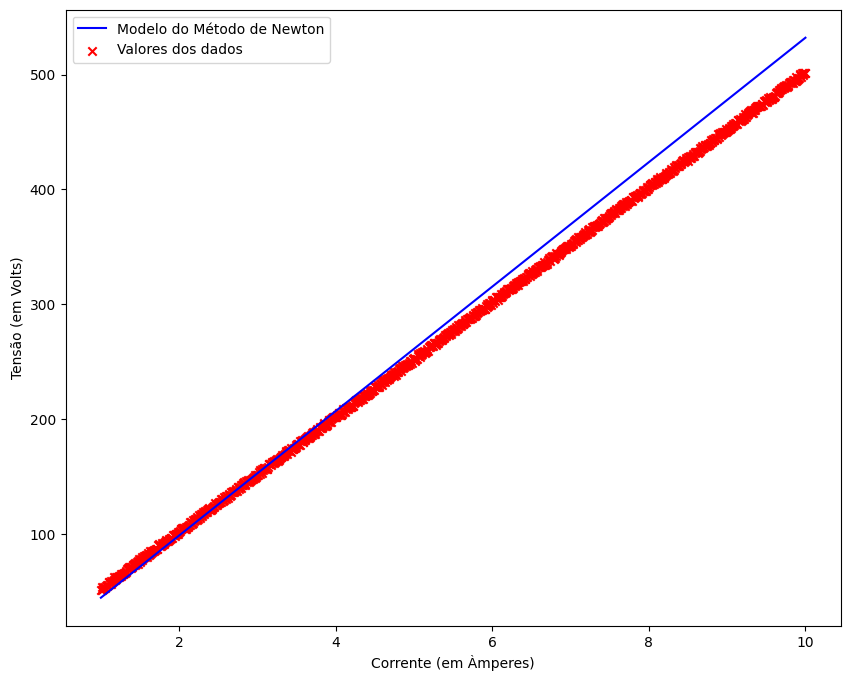

Custo J para esse conjunto de parâmetros w,b: 122.4646
dj_dw: 9.0114e+01, dj_db: 2.2544e+01


In [230]:
f_wb = w_final * x_calc + b_final

J = calcula_custo(x_calc, y_calc, w_final, b_final)

dj_dw, dj_db = calcula_gradiente(x_calc, y_calc, w_final, b_final)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_calc, f_wb, c='b',label='Modelo do Método de Newton')

# Plotando os dados medidos
plt.scatter(x_calc, y_calc, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()
print(f"Custo J para esse conjunto de parâmetros w,b: {J:.04f}")
print(f"dj_dw: {dj_dw:.4e}, dj_db: {dj_db:.4e}")

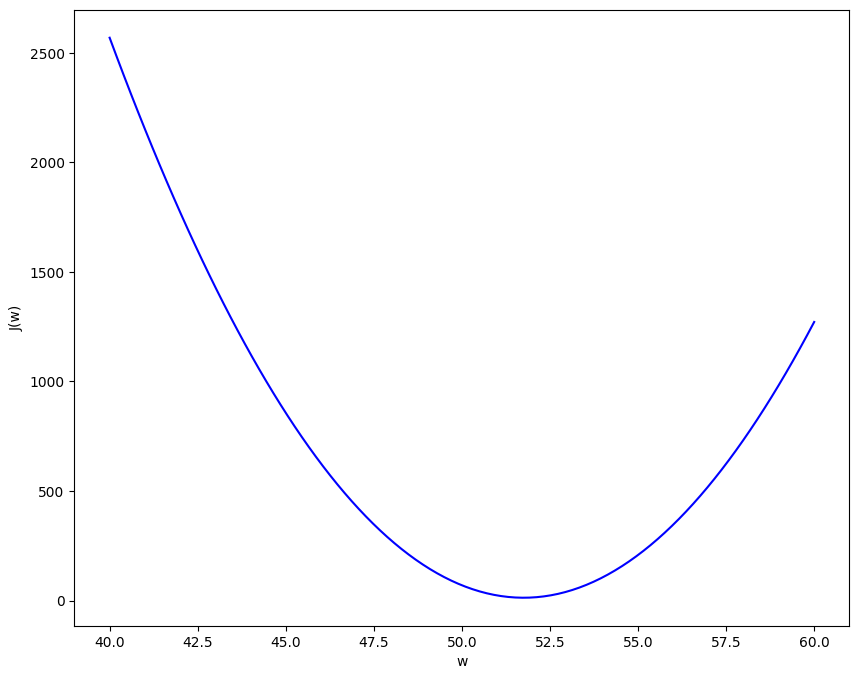

In [231]:
# valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
valores_para_w = np.linspace(40, 60, 100, endpoint=True) # deixando a curva mais bonitinha

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_calc, y_calc, w, b_final)

plt.figure(figsize=(10, 8))
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

#### Rodando o SGD

In [232]:
iteracoes = 3000
# SGD trabalha melhor com taxas de aprendizado pequenas
alpha = 9e-3 # otimizado pelo método do olhômetro e VC (Vai Cavalo!!!)
w_inicial = 0
b_inicial = 0
# Roda o método do gradiente
w_final, b_final, J_hist, p_hist = sgd(x_trein ,y_trein, w_inicial, b_inicial, alpha,
                                                    iteracoes, calcula_custo, calcula_gradiente)
print(f"(w,b) Encontrados pelo Método SGD: ({w_final:8.4f},{b_final:8.4f})")

Iteração    0: Custo 2.13e+00, w: 47.946, b: 7.213
Iteração  300: Custo 4.81e-01, w: 50.020, b: 1.891
Iteração  600: Custo 4.81e-01, w: 50.036, b: 1.892
Iteração  900: Custo 4.93e-01, w: 50.066, b: 1.938
Iteração 1200: Custo 4.88e-01, w: 49.995, b: 1.838
Iteração 1500: Custo 4.93e-01, w: 49.984, b: 1.835
Iteração 1800: Custo 5.12e-01, w: 50.111, b: 1.916
Iteração 2100: Custo 4.82e-01, w: 50.053, b: 1.866
Iteração 2400: Custo 4.84e-01, w: 50.058, b: 1.882
Iteração 2700: Custo 4.97e-01, w: 50.094, b: 1.890
Iteração 2999: Custo 4.87e-01, w: 50.082, b: 1.845
(w,b) Encontrados pelo Método SGD: ( 50.0822,  1.8451)


#### Custo versus iterações no Método SGD

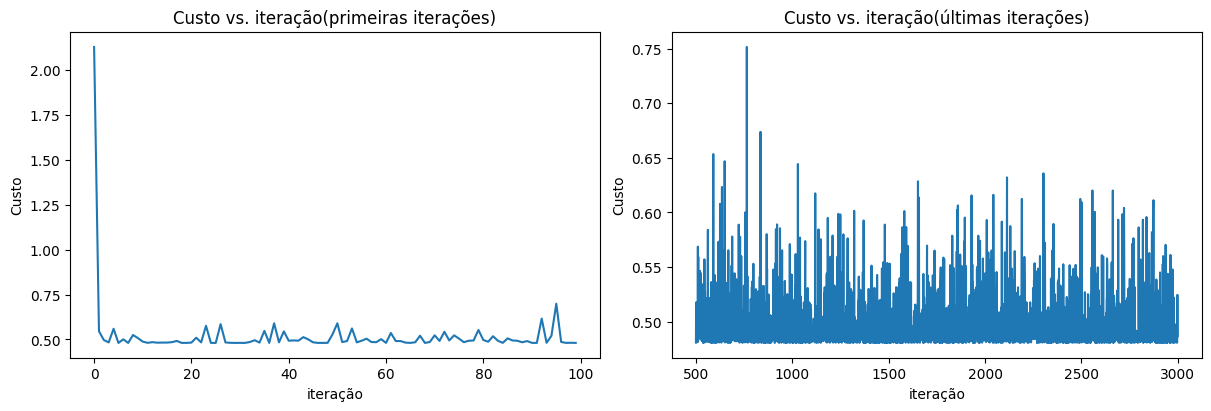

In [233]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

#### Previsões Utilizando os parâmetros encontrados pelo Método SGD

In [234]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

x_test = np.linspace(10, 20, 10)
messages = [f"Para uma corrente de {x:.2f} A temos uma tensão esperada de {w_final*x + b_final:0.1f} Volts" for x in x_test]
messages = "\n".join(messages)
print(messages)

Para uma corrente de 1 A temos uma tensão esperada de 51.9 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 119.5 Volts
Para uma corrente de 3 A temos uma tensão esperada de 152.1 Volts
Para uma corrente de 10.00 A temos uma tensão esperada de 502.7 Volts
Para uma corrente de 11.11 A temos uma tensão esperada de 558.3 Volts
Para uma corrente de 12.22 A temos uma tensão esperada de 614.0 Volts
Para uma corrente de 13.33 A temos uma tensão esperada de 669.6 Volts
Para uma corrente de 14.44 A temos uma tensão esperada de 725.3 Volts
Para uma corrente de 15.56 A temos uma tensão esperada de 780.9 Volts
Para uma corrente de 16.67 A temos uma tensão esperada de 836.5 Volts
Para uma corrente de 17.78 A temos uma tensão esperada de 892.2 Volts
Para uma corrente de 18.89 A temos uma tensão esperada de 947.8 Volts
Para uma corrente de 20.00 A temos uma tensão esperada de 1003.5 Volts


#### Calculando a reta extrapolando os valores do modelo

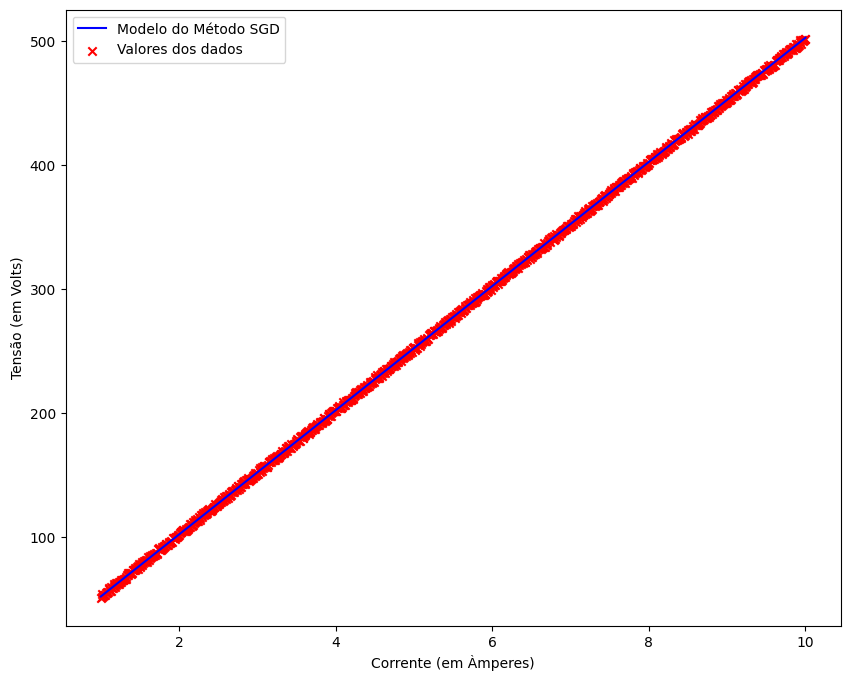

Custo J para esse conjunto de parâmetros w,b: 0.5469
dj_dw: 2.0392e+00, dj_db: 6.1381e-01


In [235]:
f_wb = w_final * x_calc + b_final

J = calcula_custo(x_calc, y_calc, w_final, b_final)

dj_dw, dj_db = calcula_gradiente(x_calc, y_calc, w_final, b_final)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_calc, f_wb, c='b',label='Modelo do Método SGD')

# Plotando os dados medidos
plt.scatter(x_calc, y_calc, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()
print(f"Custo J para esse conjunto de parâmetros w,b: {J:.04f}")
print(f"dj_dw: {dj_dw:.4e}, dj_db: {dj_db:.4e}")

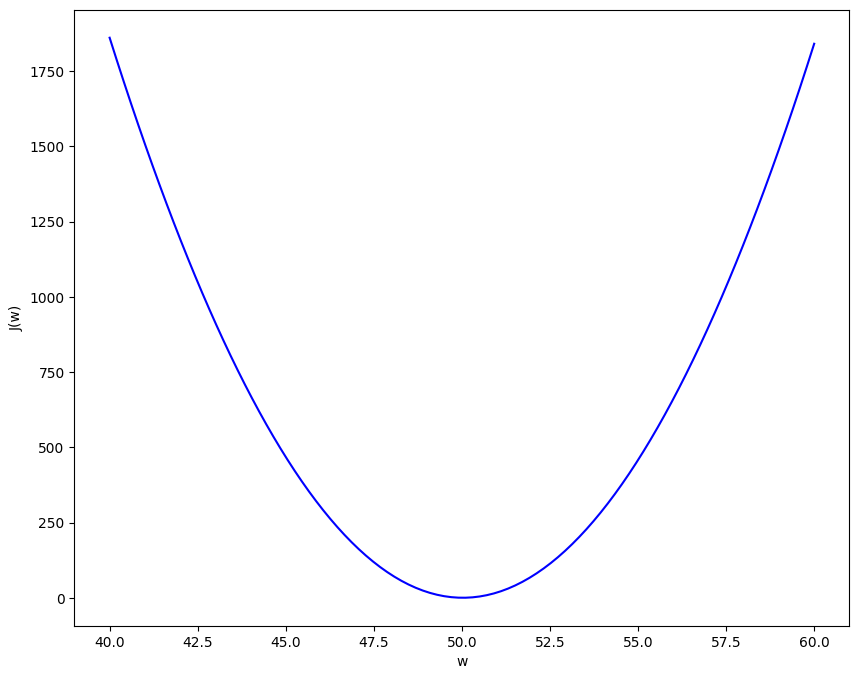

In [236]:
# valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
valores_para_w = np.linspace(40, 60, 100, endpoint=True) # deixando a curva mais bonitinha

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_calc, y_calc, w, b_final)

plt.figure(figsize=(10, 8))
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

#### Rodando o Gradiente Conjugado

In [237]:
iteracoes = 3000
# SGD trabalha melhor com taxas de aprendizado pequenas
alpha = 0.1 # otimizado pelo método do olhômetro e VC (Vai Cavalo!!!)
w_inicial = 0
b_inicial = 0
# Roda o método do gradiente
w_final, b_final, J_hist, p_hist = gradiente_conjugado(x_trein ,y_trein, w_inicial, b_inicial, alpha,
                                                    iteracoes, calcula_custo, calcula_gradiente)
print(f"(w,b) Encontrados pelo Método do Gradiente Conjugado: ({w_final:8.4f},{b_final:8.4f})")

Convergência atingida na iteração 118.
(w,b) Encontrados pelo Método do Gradiente Conjugado: ( 50.0350,  1.8607)


#### Custo versus iterações no Método Gradiente Conjugado

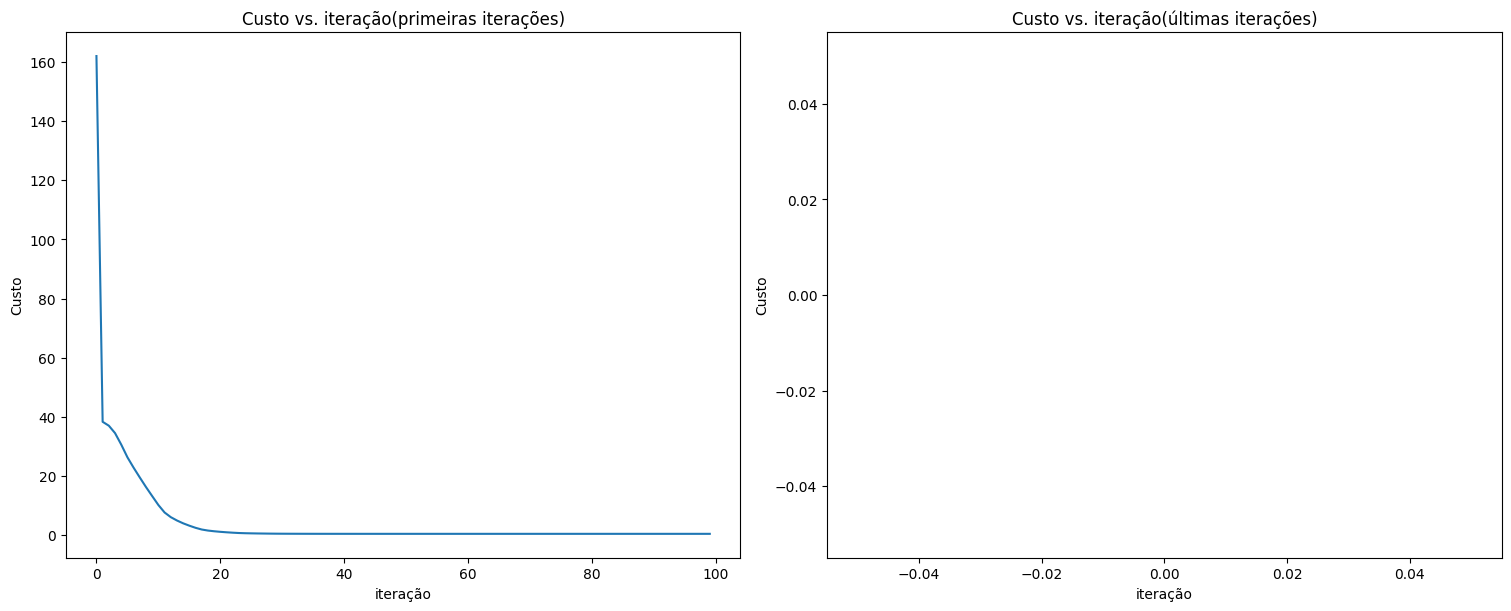

In [238]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

#### Previsões Utilizando os parâmetros encontrados pelo Método do Gradiente Conjugado

In [239]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

x_test = np.linspace(10, 20, 10)
messages = [f"Para uma corrente de {x:.2f} A temos uma tensão esperada de {w_final*x + b_final:0.1f} Volts" for x in x_test]
messages = "\n".join(messages)
print(messages)

Para uma corrente de 1 A temos uma tensão esperada de 51.9 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 119.4 Volts
Para uma corrente de 3 A temos uma tensão esperada de 152.0 Volts
Para uma corrente de 10.00 A temos uma tensão esperada de 502.2 Volts
Para uma corrente de 11.11 A temos uma tensão esperada de 557.8 Volts
Para uma corrente de 12.22 A temos uma tensão esperada de 613.4 Volts
Para uma corrente de 13.33 A temos uma tensão esperada de 669.0 Volts
Para uma corrente de 14.44 A temos uma tensão esperada de 724.6 Volts
Para uma corrente de 15.56 A temos uma tensão esperada de 780.2 Volts
Para uma corrente de 16.67 A temos uma tensão esperada de 835.8 Volts
Para uma corrente de 17.78 A temos uma tensão esperada de 891.4 Volts
Para uma corrente de 18.89 A temos uma tensão esperada de 947.0 Volts
Para uma corrente de 20.00 A temos uma tensão esperada de 1002.6 Volts


#### Calculando a reta extrapolando os valores do modelo

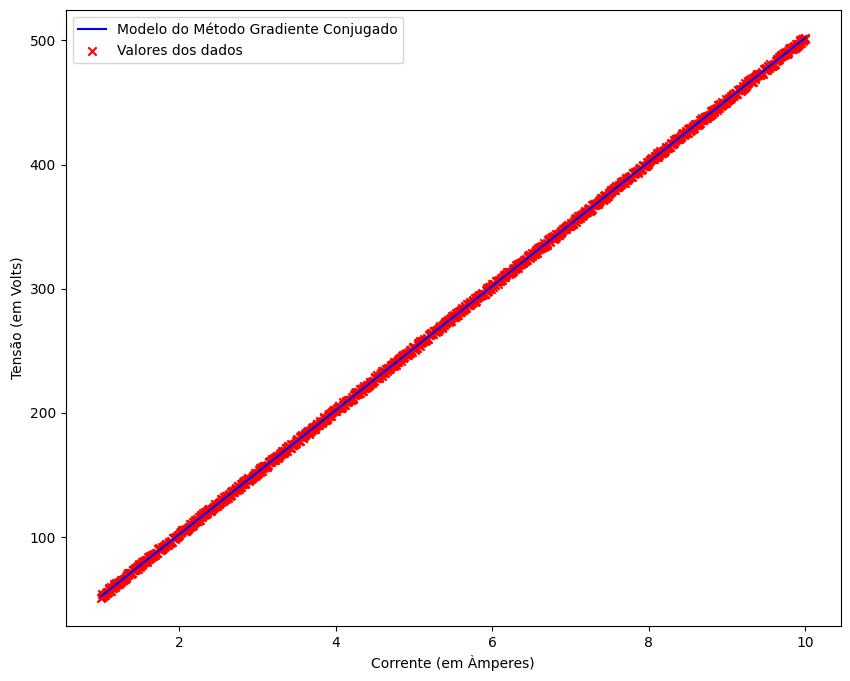

Custo J para esse conjunto de parâmetros w,b: 0.4927
dj_dw: 3.7951e-01, dj_db: 1.2626e-01


In [240]:
f_wb = w_final * x_calc + b_final

J = calcula_custo(x_calc, y_calc, w_final, b_final)

dj_dw, dj_db = calcula_gradiente(x_calc, y_calc, w_final, b_final)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_calc, f_wb, c='b',label='Modelo do Método Gradiente Conjugado')

# Plotando os dados medidos
plt.scatter(x_calc, y_calc, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()
print(f"Custo J para esse conjunto de parâmetros w,b: {J:.04f}")
print(f"dj_dw: {dj_dw:.4e}, dj_db: {dj_db:.4e}")

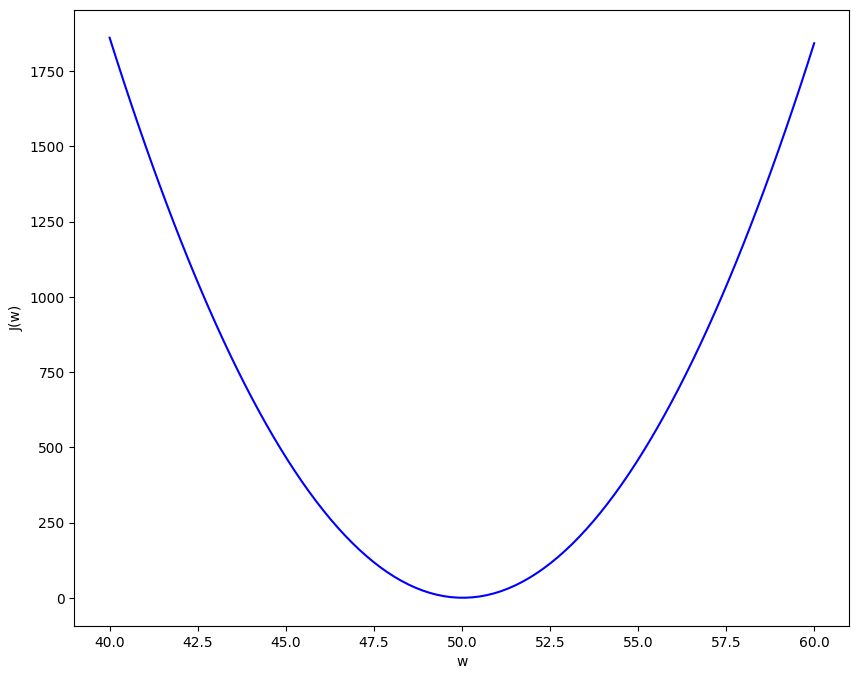

In [241]:
# valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
valores_para_w = np.linspace(40, 60, 100, endpoint=True) # deixando a curva mais bonitinha

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_calc, y_calc, w, b_final)

plt.figure(figsize=(10, 8))
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

#### Rodando o Adam

In [242]:
iteracoes = 3000
# SGD trabalha melhor com taxas de aprendizado pequenas
w_inicial = 0
b_inicial = 0
# Roda o método do gradiente
alpha = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

w_final, b_final, J_hist, p_hist = adam(x_trein ,y_trein, w_inicial, b_inicial, alpha, beta1, beta2, epsilon, iteracoes, calcula_custo, calcula_gradiente)
print(f"(w,b) Encontrados pelo Método Adam: ({w_final:8.4f},{b_final:8.4f})")

Iteração  300: Custo 2.50e+01, w: 42.183, b: 23.155
Iteração  600: Custo 3.48e+00, w: 47.292, b: 9.299
Iteração  900: Custo 6.30e-01, w: 49.422, b: 3.522
Iteração 1200: Custo 4.83e-01, w: 49.949, b: 2.094
Iteração 1500: Custo 4.80e-01, w: 50.028, b: 1.880
Iteração 1800: Custo 4.80e-01, w: 50.035, b: 1.862
Iteração 2100: Custo 4.80e-01, w: 50.035, b: 1.861
Iteração 2400: Custo 4.80e-01, w: 50.035, b: 1.861
Iteração 2700: Custo 4.80e-01, w: 50.035, b: 1.861
Iteração 3000: Custo 4.80e-01, w: 50.035, b: 1.861
(w,b) Encontrados pelo Método Adam: ( 50.0350,  1.8607)


### Custo versus iterações no Método Adam

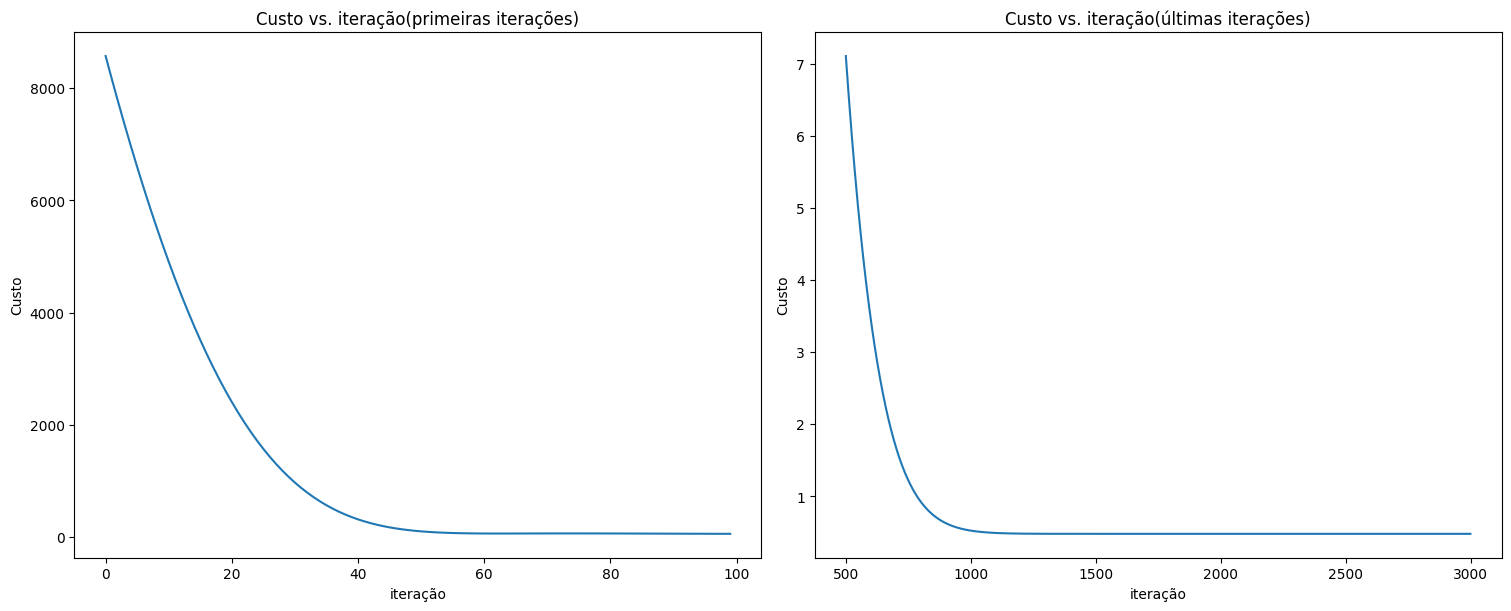

In [243]:
# gráficos do custo versus iterações
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15,6))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Custo vs. iteração(primeiras iterações)");  ax2.set_title("Custo vs. iteração(últimas iterações)")
ax1.set_ylabel('Custo')            ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')  ;  ax2.set_xlabel('iteração')
plt.show()

#### Previsões Utilizando os parâmetros encontrados pelo Método Adam

In [244]:
print(f"Para uma corrente de 1 A temos uma tensão esperada de {w_final*1.0 + b_final:0.1f} Volts")
print(f"Para uma corrente de 2.35 A temos uma tensão esperada de {w_final*2.35 + b_final:0.1f} Volts")
print(f"Para uma corrente de 3 A temos uma tensão esperada de {w_final*3.0 + b_final:0.1f} Volts")

x_test = np.linspace(10, 20, 10)
messages = [f"Para uma corrente de {x:.2f} A temos uma tensão esperada de {w_final*x + b_final:0.1f} Volts" for x in x_test]
messages = "\n".join(messages)
print(messages)

Para uma corrente de 1 A temos uma tensão esperada de 51.9 Volts
Para uma corrente de 2.35 A temos uma tensão esperada de 119.4 Volts
Para uma corrente de 3 A temos uma tensão esperada de 152.0 Volts
Para uma corrente de 10.00 A temos uma tensão esperada de 502.2 Volts
Para uma corrente de 11.11 A temos uma tensão esperada de 557.8 Volts
Para uma corrente de 12.22 A temos uma tensão esperada de 613.4 Volts
Para uma corrente de 13.33 A temos uma tensão esperada de 669.0 Volts
Para uma corrente de 14.44 A temos uma tensão esperada de 724.6 Volts
Para uma corrente de 15.56 A temos uma tensão esperada de 780.2 Volts
Para uma corrente de 16.67 A temos uma tensão esperada de 835.8 Volts
Para uma corrente de 17.78 A temos uma tensão esperada de 891.4 Volts
Para uma corrente de 18.89 A temos uma tensão esperada de 947.0 Volts
Para uma corrente de 20.00 A temos uma tensão esperada de 1002.6 Volts


#### Calculando a reta extrapolando os valores do modelo

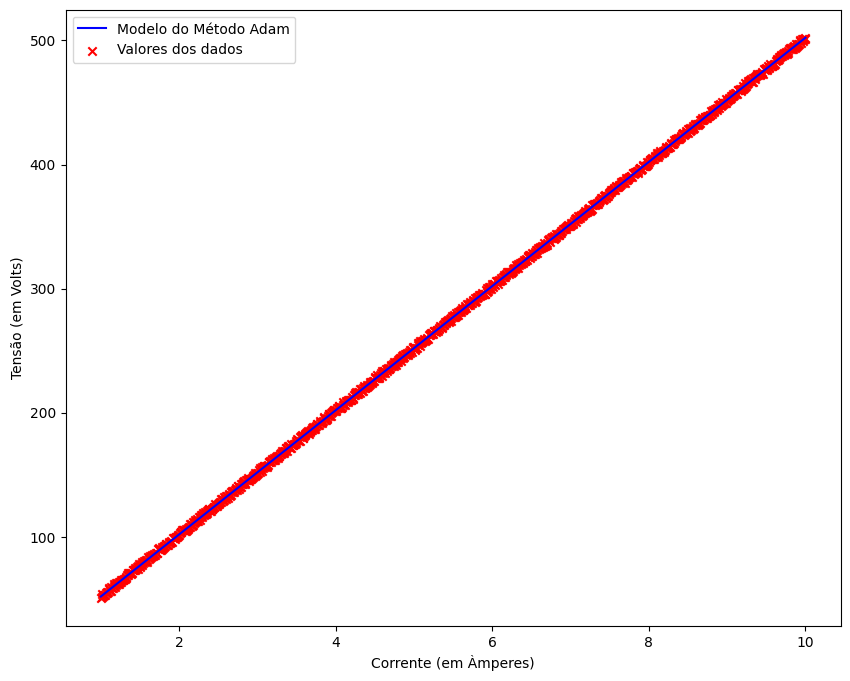

Custo J para esse conjunto de parâmetros w,b: 0.4927
dj_dw: 3.7955e-01, dj_db: 1.2627e-01


In [245]:
f_wb = w_final * x_calc + b_final

J = calcula_custo(x_calc, y_calc, w_final, b_final)

dj_dw, dj_db = calcula_gradiente(x_calc, y_calc, w_final, b_final)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_calc, f_wb, c='b',label='Modelo do Método Adam')

# Plotando os dados medidos
plt.scatter(x_calc, y_calc, marker='x', c='r',label='Valores dos dados')

# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()
print(f"Custo J para esse conjunto de parâmetros w,b: {J:.04f}")
print(f"dj_dw: {dj_dw:.4e}, dj_db: {dj_db:.4e}")

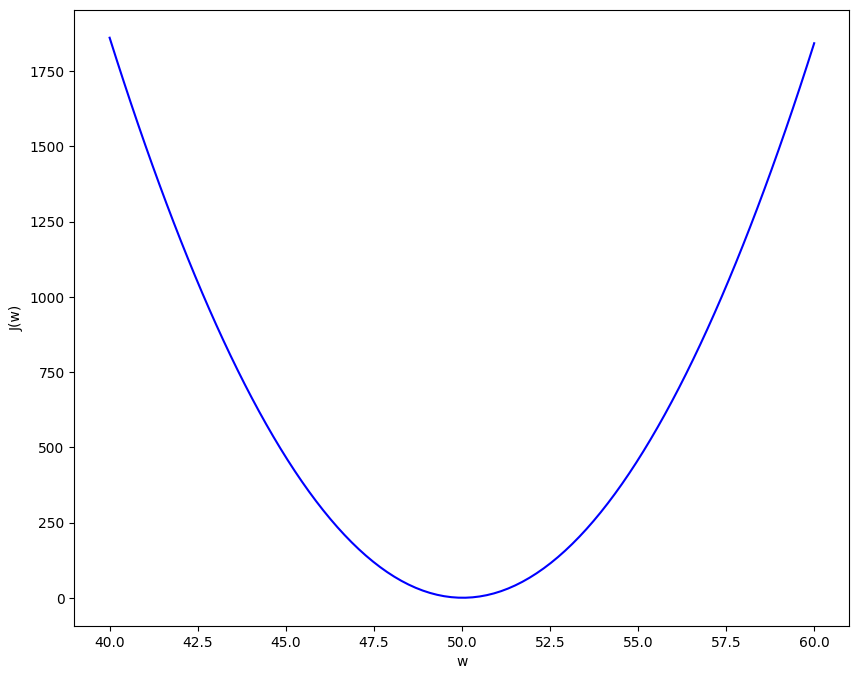

In [246]:
# valores_para_w = np.array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
valores_para_w = np.linspace(40, 60, 100, endpoint=True) # deixando a curva mais bonitinha

qtdade_de_valores = valores_para_w.shape[0]

J = np.zeros(qtdade_de_valores)

for i in range(qtdade_de_valores):
    w    = valores_para_w[i]
    J[i] = calcula_custo(x_calc, y_calc, w, b_final)

plt.figure(figsize=(10, 8))
# Plotando o custo em J para diferentes valores de w
plt.plot(valores_para_w, J, c='b')

# Ajustando o rótulo do eixo y
plt.ylabel('J(w)')
# Ajustando o rótulo do eixo x
plt.xlabel('w')
plt.show()

### Conclusões

Cada método, incluindo o apresentado na aula, tem seus prós e contras. Os métodos adicionais apresentam falhas: O RMSProp, Newton, SGD, Gradiente Conjugado e Adam, se mal ajustados, convergem para valores bem diferentes dos parâmetros utilizados para a construção do mapa inicial. Contudo, servem de parâmetro de desempenho e acurácia para o método do gradiente utilizado em aula.

Destes algoritmos, percebe-se que:
- Velocidade e convergência nem sempre andam juntas
- Uma convergência próxima o suficiente muitas vezes é melhor que exatidão na resposta.
- A escolha do algoritmo deve levar em conta a função do modelo.